### Simple Linear Regression Model 
### OWL Trainer (version 0.0.2)

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [122]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


In [123]:
#targets = f(x,z) = w1*x - w2*z + scalar + noise
noise = np.random.uniform(-1, 1, (observations, 1))
# targets = 2*xs - 3*zs + 5 + noise
targets = 13*xs + 7*zs - 12 + noise
print(targets.shape)

(1000, 1)


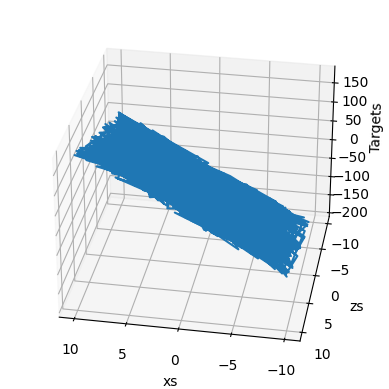

In [124]:
targets = targets.reshape(observations,1)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(xs, zs, targets)
ax.set_xlabel("xs")
ax.set_ylabel("zs")
ax.set_zlabel("Targets")
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)


In [125]:
# linear model: targets, t = y = xw + b
init_range = 0.1 # initial range gradient descent
weights = np.random.uniform(-init_range, init_range, size=(2,1))
biases = np.random.uniform(-init_range, init_range, size=1)
print("w:", weights)
print("b:", biases)

w: [[-0.0744295 ]
 [-0.04646003]]
b: [0.08085243]


In [126]:
learning_rate = 0.02

In [127]:
# train the model
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    # calculate the L2-norm loss
    loss = np.sum(deltas ** 2) / 2 / observations # mean loss per observation
    # calculate the L1-norm loss
    # loss = np.sum(np.absolute(deltas)) / 2 / observations 
    print(loss)

    deltas_scaled = deltas / observations

    # update weights and biases according to gradient descent methodology
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

3630.8559753786158
502.62399905902754
120.824666646758
72.12455770779299
63.94267697466922
60.7723907455605
58.297513016936804
55.98987098475035
53.78191533501808
51.66228015556818
49.62656807927765
47.671350695394594
45.79343222224493
43.989755089838894
42.257384058491205
40.59350010760369
38.99539568482418
37.46047028011383
35.986226191608914
34.57026446094086
33.21028096950224
31.904062689073914
30.6494840806819
29.44450363582187
28.28716055442168
27.17557155413681
26.107927805785646
25.082491989939005
24.09759546987318
23.15163557628698
22.243072999363843
21.370429283935568
20.532284423671456
19.7272745503781
18.954089714649836
18.211471754258323
17.498212246812596
16.813150543358123
16.15517187971486
15.523205562481492
14.916223226753278
14.333237162719065
13.773298708414051
13.235496706013043
12.718956019152145
12.222836108866316
11.746329665825368
11.288661296642765
10.849086262119524
10.42688926537009
10.02138328785803
9.631908471447648
9.257831044652143
8.898542291331298
8.553

In [128]:
print(weights, biases)

[[12.98831654]
 [ 6.98816658]] [-10.38944886]


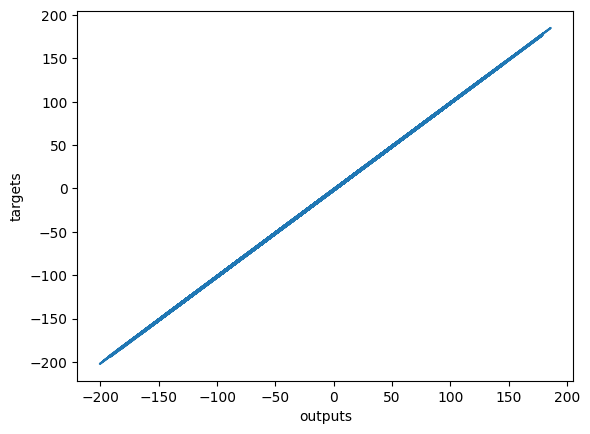

In [129]:
plt.plot(outputs, targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()